In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix



In [4]:
ENCODER = bidict({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5,
 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15,
 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21,
 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26})


In [5]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])

In [6]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32")/255
imgs.shape


(321, 50, 50)

In [7]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [8]:
imgs= np.expand_dims(imgs,-1)
# imgs.shape

In [9]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]




In [10]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [11]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [12]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
15/15 [==============================] - 20s 1s/step - loss: 3.4085 - accuracy: 0.0583 - val_loss: 3.2760 - val_accuracy: 0.0617
Epoch 2/20
15/15 [==============================] - 19s 1s/step - loss: 2.9950 - accuracy: 0.1667 - val_loss: 2.6676 - val_accuracy: 0.2469
Epoch 3/20
15/15 [==============================] - 20s 1s/step - loss: 1.4615 - accuracy: 0.6125 - val_loss: 1.3102 - val_accuracy: 0.6173
Epoch 4/20
15/15 [==============================] - 20s 1s/step - loss: 0.5981 - accuracy: 0.8208 - val_loss: 0.4360 - val_accuracy: 0.8889
Epoch 5/20
15/15 [==============================] - 20s 1s/step - loss: 0.3176 - accuracy: 0.9042 - val_loss: 0.6714 - val_accuracy: 0.8765
Epoch 6/20
15/15 [==============================] - 20s 1s/step - loss: 0.3363 - accuracy: 0.8875 - val_loss: 0.4974 - val_accuracy: 0.8519


In [13]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

3/3 [==============================] - 1s 255ms/step


In [14]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

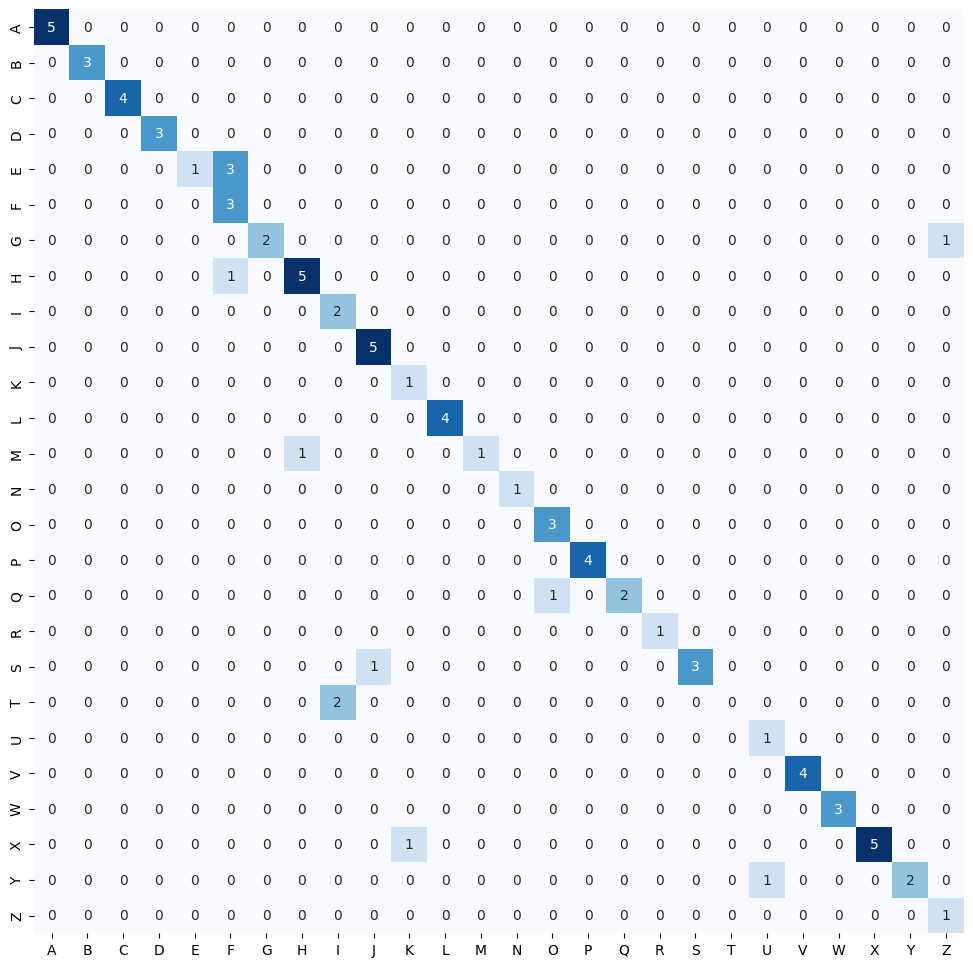

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [18]:
# model.save('G:\\projects\\python projects\\alphabet_quiz\\letter.model')
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
